
This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the Lab sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 

* Part 4 (especially 4.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.

* Do the extra credit problems last. This can help you increase your scores

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [2]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


In [288]:
# Load you data the Boston Housing data into a dataframe
# MEDV.txt containt the median house values and data.txt the other 13 features
# in order ["CRIM", "ZN", "INDUS", "CHAS", "NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
# Your code here

boston = pd.read_csv('data.txt', sep=" ", header=None)
boston.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]


In [289]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417
2,0.380457,0.0,7.340354,0.0,0.697928,7.263489,61.1,5.356935,2.0,243.0,17.919989,396.628236,4.142473
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159


In [290]:
MEDV = pd.read_csv('target.txt', sep=" ", header=None)

In [291]:
boston['MEDV'] = MEDV

In [292]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647,24.0
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417,21.6
2,0.380457,0.0,7.340354,0.0,0.697928,7.263489,61.1,5.356935,2.0,243.0,17.919989,396.628236,4.142473,34.7
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272,33.4
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159,36.2


---

## Part 1: Getting oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between median housing price and number of rooms per house. Do the following:

(a) Regress the housing price on the number of rooms per house. Draw a scatter plot of housing price (y-axis) against rooms (x-axis), and draw the regression line in blue.  You might want to make the dots semi-transparent if it improves the presentation of the figure. 

(b) Regress the housing price on the number of rooms per house and the (number of rooms per house) squared.  Show the (curved) regression line in green. 

(c) Interpret your results.

In [8]:
olsA = smf.ols(formula = "MEDV ~ RM", data=boston, missing="drop").fit()
print(olsA.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     452.3
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           4.12e-72
Time:                        15:19:37   Log-Likelihood:                -1678.2
No. Observations:                 506   AIC:                             3360.
Df Residuals:                     504   BIC:                             3369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.5762      2.748    -12.944      0.0

/Users/chuchiayi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

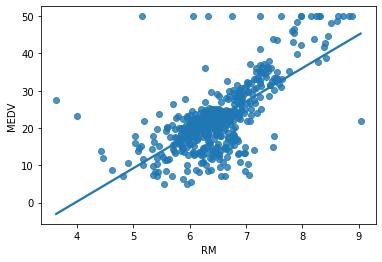

In [9]:
# Your code here
import seaborn as sns

sns.regplot(boston['RM'], boston['MEDV'], ci=None)


In [10]:
boston['RM2'] = boston['RM']**2

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RM2
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647,24.0,47.271066
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417,21.6,42.248623
2,0.380457,0.0,7.340354,0.0,0.697928,7.263489,61.1,5.356935,2.0,243.0,17.919989,396.628236,4.142473,34.7,52.758270
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272,33.4,51.980229
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159,36.2,51.611452


In [11]:
olsB = smf.ols("MEDV ~ RM + RM2", data=boston, missing="drop").fit()
print(olsB.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     294.5
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           2.19e-85
Time:                        15:19:39   Log-Likelihood:                -1644.1
No. Observations:                 506   AIC:                             3294.
Df Residuals:                     503   BIC:                             3307.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.7363     12.865      5.576      0.0

<AxesSubplot:ylabel='MEDV'>

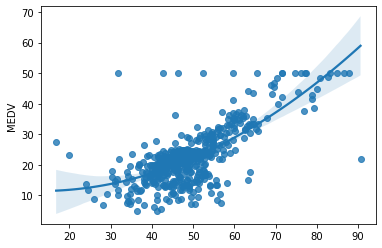

In [12]:
x = boston['RM'] + boston['RM2']
y = boston['MEDV']

sns.regplot(x=x, y=y, order=2)

The R-squared value is higher for the second model with RM-squared, which means the second model better explains the relationship and shows that there's a curvilinear relationship between the independent and dependent variables.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 5-fold cross-validation to fit the regression model (a) from 1.1, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Create a new scatterplot of housing price against rooms, and draw the five different regression lines in light blue, and the oroginal regression line from 1.1 in red (which was estimated using the full dataset). What do you notice?

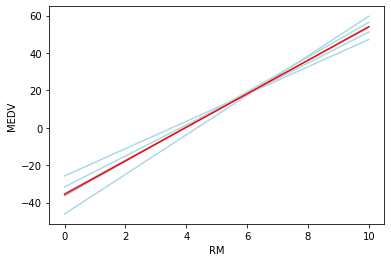

In [14]:
# from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
# your code here

X = np.array(boston['RM']).reshape(-1,1)
y = np.array(boston['MEDV']).reshape(-1,1)
LinearRegression().fit(X, y)


scores = []
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    lm = LinearRegression().fit(X[train_index], y[train_index])
    y_hat = lm.predict(X[test_index])
    
    plot_x = np.linspace(0,10,20)
    plot_y = (lm.coef_[0]*plot_x) + lm.intercept_
    plt.plot(plot_x, plot_y, 'lightblue')
#     print(lm.intercept_)
#     print(lm.coef_)


plot_x = np.linspace(0,10,20)
plot_y = (8.9599*plot_x) -35.5762
plt.plot(plot_x, plot_y, 'r')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

We see there's a line the same as the result from 1.1, as with KFold method, we can find the optimized result even with limited data.

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds
* How do your coefficients compare to the ones estimated through standard libraries? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [285]:
import time
from sklearn.metrics import mean_squared_error

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""

# y = 8.9599*X -35.5762

def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):
    # initialize the parameters
    start_time = time.time()
    epsilon = 0.000001
    alpha = 8
    beta = 5
    N = len(xvalues)
    cost = []
    for _ in range(MaxIterations):
        f = alpha + beta*xvalues - yvalues
        
        alpha -= R * (f.sum() / N)
        beta -= R * (xvalues.dot(f).sum() /  N)
        
        cost.append((f**2).sum() / (2*N))
    
        if len(cost) >=2 and abs(cost[-2] - cost[-1]) <= epsilon:
            break
        

    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta, cost[-1], len(cost)

# example function call

X = np.array(boston['RM'])
Y = np.array(boston['MEDV'])


for rate in [0.01, 0.001, 0.0001]:
    print("Learning rate: ", rate)
    alpha, beta, loss, iterations = bivariate_ols(X, Y, rate, 100000)
    print("The alpha value is: ", alpha)
    print("The beta value is: ", beta)
    print("The loss: ", loss)
    print("The iterations took is: ", iterations, "\n")


# print("Learning rate: 0.01")
# print(bivariate_ols(X, Y, 0.01, 100000))

# print("Learning rate: 0.001")
# print(bivariate_ols(X, Y, 0.001, 100000))

# print("Learning rate: 0.0001")
# print(bivariate_ols(X, Y, 0.0001, 100000))

Learning rate:  0.01
Time taken: 0.52 seconds
The alpha value is:  -34.71084330598299
The beta value is:  8.82801927998741
The loss:  22.25031408959191
The iterations took is:  34232 

Learning rate:  0.001
Time taken: 1.55 seconds
The alpha value is:  -21.796742796883024
The beta value is:  6.859514530068914
The loss:  23.355441866019934
The iterations took is:  100000 

Learning rate:  0.0001
Time taken: 1.50 seconds
The alpha value is:  2.9403234777936045
The beta value is:  3.0888274097048987
The loss:  30.914554225415674
The iterations took is:  100000 



* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of R)
* Report the total running time of your algorithm, in seconds

Shown as above results.

* How do your coefficients compare to the ones estimated through standard libraries? Does this depend on R?

The coefficient in 1.1 is (alpha, beta) = (-35.5762, 8.9599)
The results from learning rate at 0.01 is the closest to the results from the standard library. This is because when the learning rates are too small (0.001 & 0.0001), so we can't find the optimized (alpha, beta) within the iteration limit.


### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [48]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using TAX and RM as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [284]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def createXvector(xvalue_matrix):
    vectorX = np.c_[np.ones((len(xvalue_matrix), 1)), xvalue_matrix]
    return vectorX

def createTheta(xvalue_matrix):
    theta = np.random.randn(len(xvalue_matrix[0])+1, 1)
    return theta

def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    # your code here
    start_time = time.time()
    epsilon = 0.000001
    
    y_reshaped = np.reshape(yvalues, (len(yvalues), 1))
    costs = []
    vectorX = createXvector(xvalue_matrix)
    theta = createTheta(xvalue_matrix)
    m = len(xvalue_matrix)
    
    for _ in range(MaxIterations):
        gradients = 2/m * vectorX.T.dot(vectorX.dot(theta) - y_reshaped)
        theta = theta - R * gradients
        y_pred = vectorX.dot(theta)
        cost = 1/(2*len(yvalues))*((y_pred - yvalues)**2)
#         print(cost)
        
        total = 0
        for i in range(len(yvalues)):
            total += cost[i][0]
        costs.append(total)
#         print(total)
        
        if len(costs) >=2 and abs(costs[-2] - costs[-1]) <= epsilon:
                break  
        
    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return theta[0], theta[1:], costs[-1], len(costs)
#     return alpha, beta_array

X_matrix = np.column_stack((np.array(boston['RM']), np.array(boston['TAX'])))
Y = np.array(boston['MEDV'])


for rate in [0.01, 0.001, 0.0001]:
    print("Learning rate: ", rate)
    alpha, beta_array, loss, iterations = multivariate_ols(standardize(X_matrix), Y, rate, 100000)
    print("The alpha value is: ", alpha)
    print("The beta_array is: ", beta_array)
    print("The loss: ", loss)
    print("The iterations took is: ", iterations, "\n")
    
# alpha, beta_array, loss, iterations = multivariate_ols(standardize(X_matrix), Y, 0.01, 100000)
# print(multivariate_ols(standardize(X_matrix), Y, 0.01, 100000))

# print("Learning rate: 0.001")
# print(multivariate_ols(standardize(X_matrix), Y, 0.001, 100000))

# print("Learning rate: 0.0001")
# print(multivariate_ols(standardize(X_matrix), Y, 0.0001, 100000))

Learning rate:  0.01
Time taken: 0.29 seconds
The alpha value is:  [22.5322371]
The beta_array is:  [[ 5.53823667]
 [-2.72185118]]
The loss:  24.438563857934398
The iterations took is:  523 

Learning rate:  0.001
Time taken: 2.62 seconds
The alpha value is:  [22.53132888]
The beta_array is:  [[ 5.5377043 ]
 [-2.72236431]]
The loss:  24.43874501259081
The iterations took is:  4799 

Learning rate:  0.0001
Time taken: 23.05 seconds
The alpha value is:  [22.5240198]
The beta_array is:  [[ 5.53458197]
 [-2.72518652]]
The loss:  24.441948655708664
The iterations took is:  38670 



* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of R)
* Report the total running time of your algorithm, in seconds

Shown as above results.

* Interpretation

The results from the three learning rates are quite similar, as we are able to find the minimun loss within iteration limit.


### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [286]:
# Your code here
for rate in [0.1, 0.01, 0.001]:
    print("Learning rate: ", rate)
    alpha, beta_array, loss, iterations = multivariate_ols(X_matrix, Y, rate, 100000)
    print("The alpha value is: ", alpha)
    print("The beta_array is: ", beta_array)
    print("The loss: ", loss)
    print("The iterations took is: ", iterations, "\n")

# print("Learning rate: 0.1")
# print(multivariate_ols(X_matrix, Y, 0.1, 100000))

# print("Learning rate: 0.01")
# print(multivariate_ols(X_matrix, Y, 0.01, 100000))

# print("Learning rate: 0.001")
# print(multivariate_ols(X_matrix, Y, 0.001, 100000))

Learning rate:  0.1


/var/folders/z7/qfh431gd2hl9fztg2f0y4h7r0000gn/T/ipykernel_3008/1776497120.py:52: RuntimeWarning: overflow encountered in square
  cost = 1/(2*len(yvalues))*((y_pred - yvalues)**2)


Time taken: 53.75 seconds
The alpha value is:  [nan]
The beta_array is:  [[nan]
 [nan]]
The loss:  nan
The iterations took is:  100000 

Learning rate:  0.01
Time taken: 56.61 seconds
The alpha value is:  [nan]
The beta_array is:  [[nan]
 [nan]]
The loss:  nan
The iterations took is:  100000 

Learning rate:  0.001
Time taken: 57.80 seconds
The alpha value is:  [nan]
The beta_array is:  [[nan]
 [nan]]
The loss:  nan
The iterations took is:  100000 



If we don't standardize our variables, the function will not be able to converge, and the cost will be infinite.

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Make sure to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that. Use 5-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for TAX and RM). Since there are 5 folds, there will be 5 sets of three coefficients -- report them all in a 5x3 table.

In [71]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [181]:
# Your code here
from tabulate import tabulate

kf = KFold(n_splits=5)
X_matrix_standardized = standardize(X_matrix)

values = []
for train_index, test_index in kf.split(X_matrix_standardized):
    alpha, beta_arr, _, _ = multivariate_ols(X_matrix_standardized[train_index], Y[train_index])
    
    value = [alpha]
    value.append(beta_arr[0])
    value.append(beta_arr[1])
    values.append(value)

head = ["Intercept", "RM coefficient", "TAX coefficient"]
print(tabulate(values, headers=head))

Time taken: 0.28 seconds
Time taken: 0.24 seconds
Time taken: 0.29 seconds
Time taken: 0.21 seconds
Time taken: 0.19 seconds
  Intercept    RM coefficient    TAX coefficient
-----------  ----------------  -----------------
    23.044            5.25849           -3.14676
    22.2681           4.90349           -2.73388
    21.937            4.54228           -2.4925
    22.22             6.65563           -3.26529
    23.1918           6.15649           -1.65043


The result from 2.3

Learning rate:  0.01
Time taken: 0.29 seconds
The alpha value is:  [22.5322371]
The beta_array is:  [[ 5.53823667]
 [-2.72185118]]
The loss:  24.438563857934398
The iterations took is:  523 

Learning rate:  0.001
Time taken: 2.62 seconds
The alpha value is:  [22.53132888]
The beta_array is:  [[ 5.5377043 ]
 [-2.72236431]]
The loss:  24.43874501259081
The iterations took is:  4799 

Learning rate:  0.0001
Time taken: 23.05 seconds
The alpha value is:  [22.5240198]
The beta_array is:  [[ 5.53458197]
 [-2.72518652]]
The loss:  24.441948655708664
The iterations took is:  38670 

The results from KFold vary a bit, as a result, we shoe exam what's the best model and if there's overfitting problem from previous results.

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the cross-validated RMSE for each of the 5 folds above. In other words, in fold 1, use the parameters estimated on the 80% of the data to make predictions for the 20%, and calculate the RMSE for those 20%. Repeate this for the remaining folds. Report the RMSE for each of the 5-folds, and the average (mean) RMSE across the five folds. How does this average RMSE compare to the performance of your nearest neighbor algorithm from the last problem set?

In [182]:
# Credit: compute_rmse function taken from PS3
def compute_rmse(predictions, yvalues):
    pre = np.asarray(predictions)
    y = np.asarray(yvalues)
    rmse = np.sqrt(np.sum((pre-y) ** 2) / float(len(y)))
    return rmse

In [215]:
# Your code here

# kf = KFold(n_splits=5)
# X_matrix_standardized = standardize(X_matrix)

RMSE = []
for train_index, test_index in kf.split(X_matrix_standardized):
    alpha, beta_arr, _, _ = multivariate_ols(X_matrix_standardized[train_index], Y[train_index])
    theta = []
    theta.append(alpha[0])
    for i in range(len(beta_arr)):
        theta.append(beta_arr[i][0])

#     y_hat = [] 
#     for i in range(len(test_index)):
#         value = alpha + sum(beta_arr[0]*X_matrix_standardized[test_index][i][0], beta_arr[1]*X_matrix_standardized[test_index][i][1])
#         y_hat.append(value)

    X_mat = np.c_[np.ones((len(test_index), 1)), X_matrix_standardized[test_index]]
    y_hat = X_mat.dot(theta)
    RMSE.append(compute_rmse(y_hat, Y[test_index]))

print(RMSE)
print("the average RMSE is", np.mean(RMSE))

Time taken: 0.29 seconds
Time taken: 0.23 seconds
Time taken: 0.29 seconds
Time taken: 0.23 seconds
Time taken: 0.18 seconds
[4.253799623999337, 5.567110862985532, 5.537024727633761, 10.587117087372004, 6.773439076923077]
the average RMSE is 6.543698275782742


The RMSE I got from PS3 with the same independent variables is 9.81. We see the RMSE is much smaller here, as KFold method can help us find the optimized result.

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [ ]:
# Your code here

*Discuss your results here*

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: Randomly sample 80% of your data and call this the training set, and set aside the remaining 20% as your test set.

In [287]:
# Your code here
# step 1-1: create combinations as F_s_features
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

N = len(features)
F_s_features = []
for i in range(N):
    F_s_features.append([features[i]])
    for j in range(i+1):
        F_s_features.append([features[i], features[j]])


len(F_s_features)
F_s_features

[['CRIM'],
 ['CRIM', 'CRIM'],
 ['ZN'],
 ['ZN', 'CRIM'],
 ['ZN', 'ZN'],
 ['INDUS'],
 ['INDUS', 'CRIM'],
 ['INDUS', 'ZN'],
 ['INDUS', 'INDUS'],
 ['CHAS'],
 ['CHAS', 'CRIM'],
 ['CHAS', 'ZN'],
 ['CHAS', 'INDUS'],
 ['CHAS', 'CHAS'],
 ['NOX'],
 ['NOX', 'CRIM'],
 ['NOX', 'ZN'],
 ['NOX', 'INDUS'],
 ['NOX', 'CHAS'],
 ['NOX', 'NOX'],
 ['RM'],
 ['RM', 'CRIM'],
 ['RM', 'ZN'],
 ['RM', 'INDUS'],
 ['RM', 'CHAS'],
 ['RM', 'NOX'],
 ['RM', 'RM'],
 ['AGE'],
 ['AGE', 'CRIM'],
 ['AGE', 'ZN'],
 ['AGE', 'INDUS'],
 ['AGE', 'CHAS'],
 ['AGE', 'NOX'],
 ['AGE', 'RM'],
 ['AGE', 'AGE'],
 ['DIS'],
 ['DIS', 'CRIM'],
 ['DIS', 'ZN'],
 ['DIS', 'INDUS'],
 ['DIS', 'CHAS'],
 ['DIS', 'NOX'],
 ['DIS', 'RM'],
 ['DIS', 'AGE'],
 ['DIS', 'DIS'],
 ['RAD'],
 ['RAD', 'CRIM'],
 ['RAD', 'ZN'],
 ['RAD', 'INDUS'],
 ['RAD', 'CHAS'],
 ['RAD', 'NOX'],
 ['RAD', 'RM'],
 ['RAD', 'AGE'],
 ['RAD', 'DIS'],
 ['RAD', 'RAD'],
 ['TAX'],
 ['TAX', 'CRIM'],
 ['TAX', 'ZN'],
 ['TAX', 'INDUS'],
 ['TAX', 'CHAS'],
 ['TAX', 'NOX'],
 ['TAX', 'RM'],
 ['TAX', 

In [295]:
# step 1-2: add variable-squared data in boston dataset
for feature in features:
    boston[feature+'2'] = boston[feature]**2

In [296]:
# step 2: shuffle the data 

np.random.seed(1)

ids = np.arange(0, len(boston), 1)
ids = np.random.permutation(ids)
boston_shuffled = boston.iloc[ids]

In [297]:
# step 1-3: prepare data in matrix and standardize them as F_s_standardized

F_s_standardized = []

for pair in F_s_features:
    if len(pair) == 1:
        curr_matrix = np.column_stack(np.array(boston_shuffled[pair]))
        F_s_standardized.append(standardize(curr_matrix[0]))
    elif pair[0] == pair[1]:
        curr_matrix = np.column_stack(np.array(boston_shuffled[pair[0]+'2']))
        F_s_standardized.append(standardize(curr_matrix[0]))
    else:
        curr_matrix = np.column_stack((np.array(boston_shuffled[pair[0]]), np.array(boston_shuffled[pair[1]])))
        F_s_standardized.append(standardize(curr_matrix))


print(len(F_s_standardized))
print(len(F_s_standardized[0]))

104
506


In [298]:
# step 2-2: seperate into test and training datasets
# credit: lab4 solution

train_percent = .80
train_number = int(train_percent*len(boston))
# print('Total examples: %i' % len(boston))
# print('Number of training examples: %i' % train_number)
# print('Number of testing examples: %i' % (len(boston) - train_number))

# np.random.seed(1)

# ids = np.arange(0, len(boston), 1)
# ids = np.random.permutation(ids)
# boston_shuffled = boston.iloc[ids]

y_train_set = boston_shuffled['MEDV'][:train_number]
y_test_set = boston_shuffled['MEDV'][train_number:]

X_train_sets = []
X_test_sets = []

for dataset in F_s_standardized:
    X_train_sets.append(dataset[:train_number])
    X_test_sets.append(dataset[train_number:])
    
print(len(X_train_sets))
print(len(X_train_sets[3]))
print(len(X_test_sets))
print(len(X_test_sets[3]))
print(len(y_train_set))
print(len(y_test_set))


104
404
104
102
404
102


### 4.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can (Don't forget to add quadratic terms. Form instance, RM^2.).  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [366]:
# Your code here

for i in range(50,61):
    print("The features set is", F_s_features[i])
    
    coefs = []
    if len(X_train_sets[i].shape)== 2 and X_train_sets[i].shape[1] == 2:
        alpha, beta_arr, _, _ = multivariate_ols(X_train_sets[i], np.array(y_train_set).reshape(-1,1))
        coefs.append(alpha[0])
        for j in range(len(beta_arr)):
            coefs.append(beta_arr[j][0])
    else:
        alpha, beta_arr, _, _ = multivariate_ols(np.array(X_train_sets[i]).reshape(-1,1), np.array(y_train_set).reshape(-1,1))
        coefs.append(alpha[0])
        for j in range(len(beta_arr)):
            coefs.append(beta_arr[j][0])        
#     coefs = []
#     coefs.append(alpha[0])
#     for j in range(len(beta_arr)):
#         coefs.append(beta_arr[j][0])
    
#     print(coefs)
    X_mat_test = np.c_[np.ones((len(X_test_sets[i]), 1)), X_test_sets[i]]
    y_hat_test = X_mat_test.dot(coefs)
    print("The RMSE for test set:", compute_rmse(y_hat_test, y_test_set))

    X_mat_train = np.c_[np.ones((len(X_train_sets[i]), 1)), X_train_sets[i]]
    y_hat_train = X_mat_train.dot(coefs)
    print("The RMSE for train set:", compute_rmse(y_hat_train, y_train_set))


#     if len(X_train_sets[i].shape)== 2 and X_train_sets[i].shape[1] == 2:
#         alpha, beta_arr, _, _ = multivariate_ols(X_train_sets[i], y_train_set)
        
#         y_hat = lm.predict(np.array(X_test_sets[i]))
#         print("The RMSE for test set", compute_rmse(y_hat, y_test_set))

#         y_hat = lm.predict(np.array(X_train_sets[i]))
#         print("The RMSE for train set", compute_rmse(y_hat, y_train_set))
        
#     else:
#         lm = LinearRegression().fit(np.array(X_train_sets[i]).reshape(-1,1), y_train_set)
    
#         y_hat = lm.predict(np.array(X_test_sets[i]).reshape(-1,1))
#         print("The RMSE for test set", compute_rmse(y_hat, y_test_set))

#         y_hat = lm.predict(np.array(X_train_sets[i]).reshape(-1,1))
#         print("The RMSE for train set", compute_rmse(y_hat, y_train_set))

The features set is ['RAD', 'RM']
Time taken: 0.06 seconds
The RMSE for test set: 6.230594501814128
The RMSE for train set: 6.302344529230654
The features set is ['RAD', 'AGE']
Time taken: 0.05 seconds
The RMSE for test set: 8.527262005290995
The RMSE for train set: 8.157333599349874
The features set is ['RAD', 'DIS']
Time taken: 0.05 seconds
The RMSE for test set: 8.854725790138966
The RMSE for train set: 8.375274945999099
The features set is ['RAD', 'RAD']
Time taken: 0.05 seconds
The RMSE for test set: 8.878634676870426
The RMSE for train set: 8.350195403488142
The features set is ['TAX']
Time taken: 0.05 seconds
The RMSE for test set: 8.366198729927625
The RMSE for train set: 8.051549353647717
The features set is ['TAX', 'CRIM']
Time taken: 0.06 seconds
The RMSE for test set: 8.23972618716439
The RMSE for train set: 7.95536796976632
The features set is ['TAX', 'ZN']
Time taken: 0.05 seconds
The RMSE for test set: 7.932054943276837
The RMSE for train set: 7.832741856815916
The featu

The RMSE between test and train sets are pretty similar, which means the model is underfitting or well-fit. Compared to the result from 2.3 with the average RMSE is 6.543698275782742, the RMSE here are all higher.

### 4.3 Ridge regularization (basic)
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data, using the value lambda = 0.5.  Report the RMSE obtained for your training data, and the RMSE obtained for your testing data.

In [321]:
# Your code here
def ridge_regularization_multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000, L=0.5):
    # your code here
    start_time = time.time()
    epsilon = 0.000001
    
    y_reshaped = np.reshape(yvalues, (len(yvalues), 1))
    costs = []
    vectorX = createXvector(xvalue_matrix)
    theta = createTheta(xvalue_matrix)
    m = len(xvalue_matrix)
    
    for _ in range(MaxIterations):
        gradients = 2/m * vectorX.T.dot(vectorX.dot(theta) - y_reshaped)
        theta = theta - (theta*R*L)/m - R * gradients
        y_pred = vectorX.dot(theta)
        ridge_reg_term = ((L/(2*len(yvalues)))*(np.sum(np.square(theta))))
        cost = (1/(2*len(yvalues))*((y_pred - yvalues)**2)) + ridge_reg_term
#         print(cost)
        
        total = 0
        for i in range(len(yvalues)):
            total += cost[i][0]
        costs.append(total)
#         print(total)
        
        if len(costs) >=2 and abs(costs[-2] - costs[-1]) <= epsilon:
                break  
        
    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return theta[0], theta[1:], costs[-1], len(costs)

In [367]:
for i in range(50, 61):
    print("The features set is", F_s_features[i])
    coefs = []
    if len(X_train_sets[i].shape)== 2 and X_train_sets[i].shape[1] == 2:
        alpha, beta_arr, _, _ = ridge_regularization_multivariate_ols(X_train_sets[i], np.array(y_train_set).reshape(-1,1))
        coefs.append(alpha[0])
        for j in range(len(beta_arr)):
            coefs.append(beta_arr[j][0])
    else:
        alpha, beta_arr, _, _ = ridge_regularization_multivariate_ols(np.array(X_train_sets[i]).reshape(-1,1), np.array(y_train_set).reshape(-1,1))
        coefs.append(alpha[0])
        for j in range(len(beta_arr)):
            coefs.append(beta_arr[j][0])
#     print(coefs)
#     coefs = []
#     coefs.append(alpha[0])
#     for j in range(len(beta_arr)):
#         coefs.append(beta_arr[j][0])
    
    X_mat_test = np.c_[np.ones((len(X_test_sets[i]), 1)), X_test_sets[i]]
    y_hat_test = X_mat_test.dot(coefs)
    print("The RMSE for test set:", compute_rmse(y_hat_test, y_test_set))
    
    X_mat_train = np.c_[np.ones((len(X_train_sets[i]), 1)), X_train_sets[i]]
    y_hat_train = X_mat_train.dot(coefs)
    print("The RMSE for train set:", compute_rmse(y_hat_train, y_train_set))


The features set is ['RAD', 'RM']
Time taken: 0.12 seconds
The RMSE for test set: 6.231486989848541
The RMSE for train set: 6.3023567826547895
The features set is ['RAD', 'AGE']
Time taken: 0.10 seconds
The RMSE for test set: 8.526975873918818
The RMSE for train set: 8.157342723716503
The features set is ['RAD', 'DIS']
Time taken: 0.12 seconds
The RMSE for test set: 8.855181210680303
The RMSE for train set: 8.375281706250954
The features set is ['RAD', 'RAD']
Time taken: 0.10 seconds
The RMSE for test set: 8.877997523281275
The RMSE for train set: 8.350204639880697
The features set is ['TAX']
Time taken: 0.10 seconds
The RMSE for test set: 8.36560072739786
The RMSE for train set: 8.051559070893152
The features set is ['TAX', 'CRIM']
Time taken: 0.13 seconds
The RMSE for test set: 8.23891445607453
The RMSE for train set: 7.955373276105389
The features set is ['TAX', 'ZN']
Time taken: 0.11 seconds
The RMSE for test set: 7.9321537943241855
The RMSE for train set: 7.832750807106321
The fea

Compared to the results in 4.2, the gap between the RMSE for test set and the RMSE for train set become a bit closer.

### 4.4: Cross-validate lambda

This is where it all comes together! Use k-fold cross-validation to select the optimal value of lambda. In other words, define a set of different values of lambda. Then, using the 80% of your data that you set aside for training, iterate through the values of lambda one at a time. For each value of lambda, use k-fold cross-validation to compute the average cross-validated (test) RMSE for that lambda value, computed as the average across the held-out folds. You should also record the average cross-validated train RMSE, computed as the average across the folds used for training. Create a scatter plot that shows RMSE as a function of lambda. The scatter plot should have two lines: a red line showing the cross-validated (test) RMSE, and a blue line showing the cross-validated train RMSE.  At this point, you should not have touched your held-out 20% of "true" test data.

What value of lambda minimizes your cross-validated (test) RMSE? Fix that value of lambda, and train a new model using all of your training data with that value of lambda (i.e., use the entire 80% of the data that you set aside in 4.1). Calcuate the RMSE for this model on the 20% of "true" test data. How does your test RMSE compare to the RMSE from 4.3, 4.2, 2.3, and to the RMSE from nearest neighbors? What do you make of these results?

Go brag to your friends about how you just implemented cross-validated ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [332]:
lambdas = np.linspace(0,10,11)

In [350]:
y_train_data = np.array(y_train_set)
y_test_data = np.array(y_test_set)
X_train_data = X_train_sets[60]
X_test_data = X_test_sets[60]

# X_train_sets = []
# X_test_sets = []

In [355]:
# Your code here

RMSE_avg_train = []
RMSE_avg_test = []

for L in lambdas:
    kf = KFold(n_splits=5)
    RMSE_sub_train = []
    RMSE_sub_test = []
    for train_idx, test_idx in kf.split(X_train_data):

        X_sub_train = X_train_data[train_idx]
        X_sub_test = X_train_data[test_idx]
        
        y_sub_train = y_train_data[train_idx]
        y_sub_test = y_train_data[test_idx]
        
        alpha, beta_arr, _, _ = ridge_regularization_multivariate_ols(X_sub_train, y_sub_train, 0.01, 1000, L)
        
        coefs = []
        coefs.append(alpha[0])
        for j in range(len(beta_arr)):
            coefs.append(beta_arr[j][0])
            
            
        X_mat_test = np.c_[np.ones((len(X_sub_test), 1)), X_sub_test]
        y_hat_test = X_mat_test.dot(coefs)
        print("The RMSE for test set:", compute_rmse(y_hat_test, y_sub_test))
        RMSE_sub_test.append(compute_rmse(y_hat_test, y_sub_test))
        
        X_mat_train = np.c_[np.ones((len(X_sub_train), 1)), X_sub_train]
        y_hat_train = X_mat_train.dot(coefs)
        print("The RMSE for train set:", compute_rmse(y_hat_train, y_sub_train))
        RMSE_sub_train.append(compute_rmse(y_hat_train, y_sub_train))
    
    
    RMSE_avg_test.append(np.mean(RMSE_sub_test))
    RMSE_avg_train.append(np.mean(RMSE_sub_train))

print(RMSE_avg_train)
print(RMSE_avg_test)

Time taken: 0.19 seconds
The RMSE for test set: 6.362578647200465
The RMSE for train set: 6.123744165379022
Time taken: 0.17 seconds
The RMSE for test set: 5.805975807019213
The RMSE for train set: 6.274761466773228
Time taken: 0.21 seconds
The RMSE for test set: 6.529641767836626
The RMSE for train set: 6.0730583764059896
Time taken: 0.21 seconds
The RMSE for test set: 5.091023561928174
The RMSE for train set: 6.4091125035247565
Time taken: 0.22 seconds
The RMSE for test set: 7.206619942333616
The RMSE for train set: 5.887247637480764
Time taken: 0.27 seconds
The RMSE for test set: 6.366339822934655
The RMSE for train set: 6.123846032406392
Time taken: 0.25 seconds
The RMSE for test set: 5.800024018857976
The RMSE for train set: 6.2748668209203045
Time taken: 0.22 seconds
The RMSE for test set: 6.530616285971684
The RMSE for train set: 6.07316169267528
Time taken: 0.23 seconds
The RMSE for test set: 5.086303285774549
The RMSE for train set: 6.409211462581828
Time taken: 0.22 seconds
T

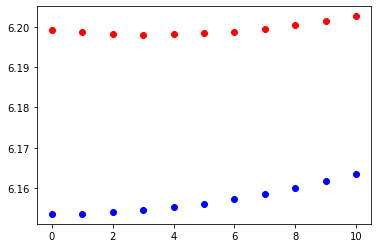

In [358]:
plt.plot(lambdas, RMSE_avg_train, 'bo', lambdas, RMSE_avg_test, 'ro')

In [363]:
print("the lambda value that has the smallest RMSE for test")
lambdas[RMSE_avg_test.index(np.min(RMSE_avg_test))]

the lambda value that has the smallest RMSE for test


3.0

What value of lambda minimizes your cross-validated (test) RMSE? Fix that value of lambda, and train a new model using all of your training data with that value of lambda (i.e., use the entire 80% of the data that you set aside in 4.1). Calcuate the RMSE for this model on the 20% of "true" test data. How does your test RMSE compare to the RMSE from 4.3, 4.2, 2.3, and to the RMSE from nearest neighbors? What do you make of these results?

In [365]:
alpha, beta_arr, _, _ = ridge_regularization_multivariate_ols(X_train_data, y_train_data, 0.01, 1000, 3)
        
coefs = []
coefs.append(alpha[0])
for j in range(len(beta_arr)):
    coefs.append(beta_arr[j][0])
            
            
X_mat_test = np.c_[np.ones((len(X_test_data), 1)), X_test_data]
y_hat_test = X_mat_test.dot(coefs)
print("The RMSE for test set:", compute_rmse(y_hat_test, y_test_data))

X_mat_train = np.c_[np.ones((len(X_train_data), 1)), X_train_data]
y_hat_train = X_mat_train.dot(coefs)
print("The RMSE for train set:", compute_rmse(y_hat_train, y_train_data))


Time taken: 0.34 seconds
The RMSE for test set: 6.054203888550373
The RMSE for train set: 6.164663824851001


The RMSE values for 4.2, 4.3, and 4.4 are pretty close, but we see a bigger difference with the result from 2.3.

###  Extra Credit 2: AdaGrad

AdaGrad is a method to implement gradient descent with different learning rates for each feature. Adaptive algorithms like this one are being extensively used especially in neural network training. Implement AdaGrad on 2.3 but now use CRIM, RM and DIS as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. Tune the algorithm until you estimate the regression coefficients within a tolerance of 1e-1. Use mini-batch gradient descent in this implementation. In summary for each parameter (in our case one intercept and three slopes) the update step of the gradient (in this example $\beta_j$) at iteration $k$ of the GD algorithm becomes:

$$\beta_j=\beta_j -\frac{R}{\sqrt{G^{(k)}_j}}\frac{\partial J(\alpha,\beta_1,\ldots)}{\partial \beta_j}$$ where
$G^{(k)}_j=\sum_{i=1}^{k} (\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j})^2$ and $R$ is your learning rate. The notation $\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j}$ corresponds to the value of the gradient at iteration $(i)$. Essentially we are "storing" information about previous iteration gradients. Doing that we effectively decrease the learning rate slower when a feature $x_i$ is sparse (i.e. has many zero values which would lead to zero gradients). Although this method is not necessary for our regression problem, it is good to be familiar with these methods as they are widely used in neural network training.  

In [ ]:
# Your code here

*Discuss your results here*